# Crisis financieras

<div style="text-align:center; font-size:26px; color:green;">Crisis Financieras 1970 - 2024.  </div>

Si no compartes el conocimiento no sirve para nada. [Michio Kaku](https://www.youtube.com/watch?v=6rDxlolYUQw)



# Bibliotecas Utilizadas

En este proyecto, utilizamos las siguientes bibliotecas de terceros:

- [yfinance](https://github.com/ranaroussi/yfinance): Una biblioteca de Python que proporciona una interfaz para acceder a los datos de Yahoo Finance.
- [Matplotlib](https://matplotlib.org/): Una biblioteca de trazado en 2D de Python que produce figuras de calidad de publicación en una variedad de formatos impresos y entornos interactivos a través de interfaces de usuario.
- [Plotly](https://plotly.com/python/): Una biblioteca de gráficos interactivos para Python que ofrece una variedad de opciones de visualización y personalización.
- [Talib](https://github.com/mrjbq7/ta-lib): Una biblioteca de análisis técnico de código abierto (licencia BSD) para Python.


- **Crisis del petróleo de 1973:** Después de que la OPEP aumentara drásticamente el precio del petróleo, se produjo una crisis energética global que afectó a muchas economías, especialmente a aquellas altamente dependientes del petróleo importado.

 - **Crisis financiera de América Latina (década de 1980):** Varios países latinoamericanos, como México, Argentina y Brasil, experimentaron crisis de deuda soberana y problemas económicos graves, causados en parte por altos niveles de endeudamiento y políticas económicas deficientes.

- **Lunes Negro (1987):** El 19 de octubre de 1987, conocido como "Lunes Negro", los mercados de valores de todo el mundo sufrieron una caída repentina y dramática. La crisis se propagó rápidamente debido a la interconexión global de los mercados financieros.

- **Crisis financiera de Asia (1997-1998):** Comenzando en Tailandia con la devaluación del baht tailandés, esta crisis se propagó rápidamente a otros países del sudeste asiático, como Indonesia, Corea del Sur y Malasia. Fue desencadenada por una combinación de factores, incluidos altos niveles de endeudamiento externo, especulación financiera y debilidades en los sistemas financieros nacionales.

- **Crisis del rublo ruso (1998):** Rusia enfrentó una crisis financiera y económica severa en 1998, que incluyó una devaluación significativa del rublo y un incumplimiento en el pago de la deuda soberana. Esta crisis tuvo repercusiones en los mercados financieros internacionales.

- **Crisis de las punto com (2000-2002):** Esta crisis se centró en el colapso de muchas empresas de tecnología de la información en 2000. El mercado de valores experimentó una caída significativa, especialmente en las acciones de las empresas de Internet.

- **Crisis financiera mundial (2007-2008):** También conocida como la Gran Recesión, esta crisis financiera global fue desencadenada por la crisis de las hipotecas de alto riesgo (subprime) en Estados Unidos. Se extendió por todo el mundo, causando una recesión económica severa y afectando los mercados financieros internacionales.

- **Crisis de la deuda soberana en Europa (2010-2012):** Esta crisis se centró en la incapacidad de varios países de la Eurozona para pagar su deuda soberana, lo que generó preocupaciones sobre la solvencia de la zona euro en su conjunto. Países como Grecia, Portugal, Irlanda, España e Italia enfrentaron dificultades financieras significativas.

- **Crisis financiera en China (2015-2016):** Durante este período, China experimentó una serie de desafíos financieros, incluida una desaceleración económica, una caída en el mercado de valores y una devaluación de su moneda, el yuan.

- **Crisis del COVID-19 (2020):** La pandemia de COVID-19 desencadenó una crisis económica mundial sin precedentes. Las medidas de confinamiento y distanciamiento social para contener la propagación del virus llevaron a cierres de empresas, pérdida de empleos y una recesión global.

# Sentimiento del mercado 

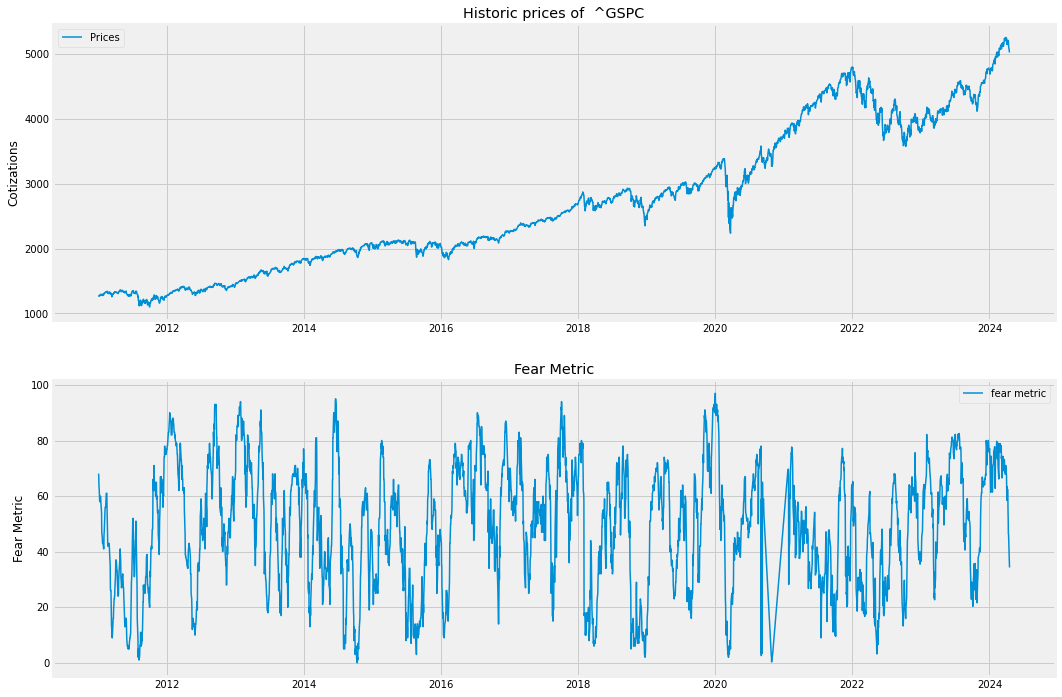

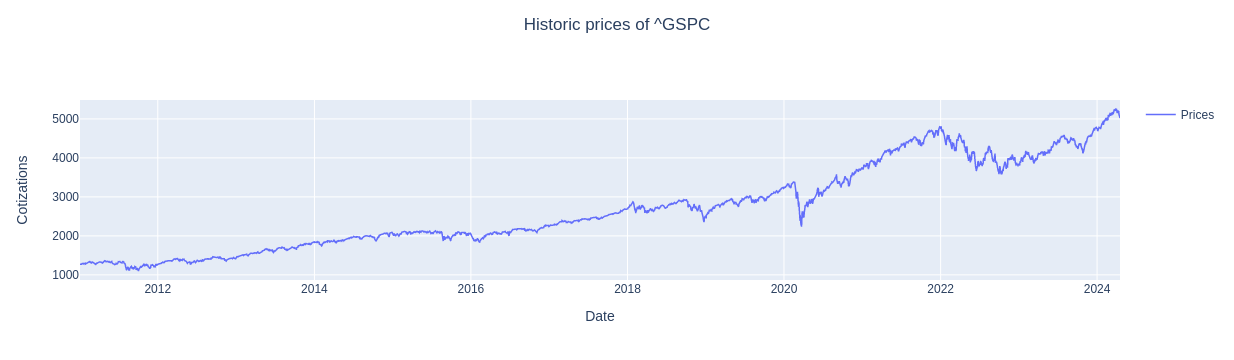

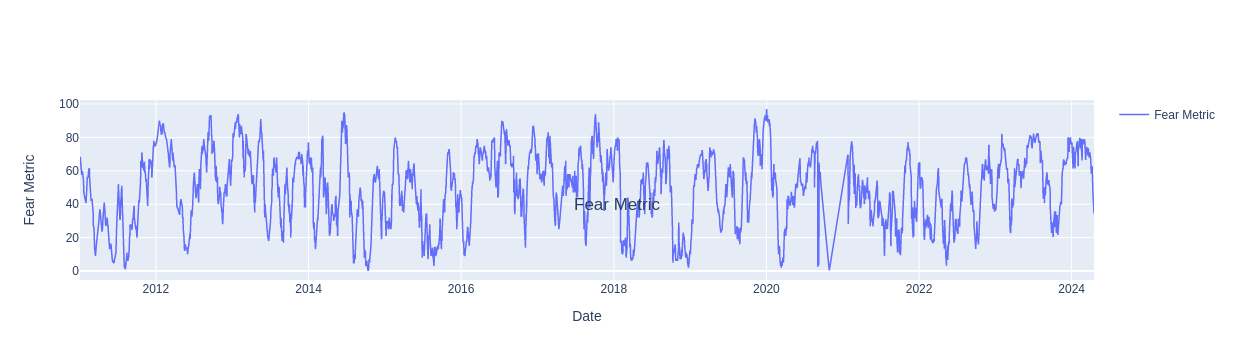

In [55]:
import os
import pandas as pd
#from datetime import date
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from datetime import datetime
#from termcolor import colored as cl 
import requests
plt.rcParams['figure.figsize'] = (12,6)   # (20,10)
plt.style.use('fivethirtyeight')
import plotly.graph_objs as go
import plotly.offline as pyo


# Importar cotizaciones de un valor
def get_quotes_yf_one_ticker(ticker, start_date, end_date):
    yfObj = yf.Ticker(ticker)
    value_name = ticker
    df_all_quotes = yf.download(ticker, start=start_date, end=end_date, progress=False)

    # Formatear el índice como "yy-mm-dd"
    df_all_quotes.index = df_all_quotes.index.strftime('%Y-%m-%d')

    # Convertir nuevamente el índice a un objeto DatetimeIndex
    df_all_quotes.index = pd.to_datetime(df_all_quotes.index)

    # Renombrar la columna 'Adj Close'
    df_all_quotes.rename(columns={'Adj Close': value_name}, inplace=True)

    df_close = df_all_quotes.copy(deep=True).dropna()
    df_close.drop(['Open', 'High', 'Low', value_name, 'Volume'], axis=1, inplace=True)

    return df_all_quotes, df_close, value_name

def get_quotes_from_xlsx():
    # Import of quotes of the analyzed asset
    amundiMSCI = pd.read_excel('AmundiMSCI.xlsx', parse_dates = True, na_values='n/a')
    #amundiMSCI.set_index('Date', inplace=True) 
    return  amundiMSCI

def get_fear_greed_from_20200818():

    headers = {
       'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/101.0.4951.67 Safari/537.36'
    }

    BASE_URL = "https://production.dataviz.cnn.io/index/fearandgreed/graphdata"

    # 2020-09-18
    START_DATE = '2020-08-18'

    r = requests.get("{}/{}".format(BASE_URL, START_DATE), headers=headers)
    data = r.json()

    fear_greed_index = pd.DataFrame(data['fear_and_greed_historical']['data'])
    fear_greed_index['x'] = pd.to_datetime(fear_greed_index['x']//1000, unit='s').dt.strftime('%Y-%m-%d')
    fear_greed_index = fear_greed_index.rename(columns={'x':'date','y':'fear_metric'})


    fear_greed_index['date'] = fear_greed_index['date'].astype('datetime64[ns]')
    fear_greed_index['date'] = pd.to_datetime(fear_greed_index['date'], format='%Y%m%d')

    fear_greed_index = fear_greed_index.rename(columns={'date':'Date' })
    fear_greed_index.set_index('Date', inplace = True)

    df_fear_greed_internet = fear_greed_index.drop_duplicates() 
    #df_fear_gear_internet.to_excel('df_fear_greed_internet.xlsx')
    df_fear_greed_internet.to_csv('df_fear_greed_internet.csv')

    return df_fear_greed_internet

def get_fear_greed_2011_2020():
    # Establecer el directorio base.  Set the base directory.
    #base = os.path.normpath("/media/enri/Mi_Proyecto/Trabajo_Gestion-Conservadora-de-Activos_Financieros/Datos/")

    # Cambiar a un directorio específico. Change to a specific directory
    #base_dir = os.path.join(base, "Ficheros_varios/" )
    #os.chdir(base_dir)
    os.chdir("/media/enri/Mi_Proyecto/Python-Trading-Gestion-Conservadora/Datos/Ficheros_varios")

    # Import 'Fear_Gear 2011-august 2020
    df_fear_greed_2011_2020 = pd.read_csv('fear-greed_2011_2020.csv', parse_dates = True, delimiter = ',' )

    df_fear_greed_2011_2020['Date'] = df_fear_greed_2011_2020['Date'].astype('datetime64[ns]')
    df_fear_greed_2011_2020['Date'] = pd.to_datetime(df_fear_greed_2011_2020['Date'], format='%Y%m%d')

    df_fear_greed_2011_2020.set_index('Date', inplace=True)
    return df_fear_greed_2011_2020 


def get_df_fear_greed_total(df_close, df_fear_greed_2011_2020, df_fear_greed_internet ):
    df_aux = pd.concat([df_fear_greed_2011_2020, df_fear_greed_internet ], axis =0, ignore_index=False)

    #data = pd.merge(amundiMSCI.reset_index(),df_aux.reset_index(), on='Date').set_index('Date')
    df_aux = pd.merge(df_close, df_aux, on='Date').reset_index()

    return df_aux 


# Función para obtener categorías
def obtener_categorias(x):
    if x <= 25:
        return 'extreme_fear'
    elif 25 < x < 50:
        return 'fear'
    elif x == 50:
        return 'neutral'
    elif 50 < x <= 75:
        return 'greed'
    elif x > 75:
        return 'extreme_greed'
    
# Completar ratings
def complete_ratings(df_total):
    # Leer la columna 'rating' de df_aux y aplicar la función obtener_categorias a los valores NaN
    df_total['rating'] = df_total.apply(lambda row: obtener_categorias(row['fear_metric']) if pd.isna(row['rating']) else row['rating'], axis=1)
    df_total.set_index('Date', inplace=True)
    
    return df_total

def get_graphics(df_val, data):
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(16,12))
    ax1.plot(df_val.index, df_val['Close'], label='Prices', lw=1.5)
    ax1.set_ylabel('Cotizations')
    ax1.legend(loc='best')
    ax1.set_title( 'Historic prices of  '+ value_name)
    ax2.plot(data.index, data['fear_metric'], label='fear metric', lw=1.5)
    ax2.set_ylabel('Fear Metric')
    ax2.legend(loc='best')
    ax2.set_title( 'Fear Metric')
    plt.show()

import plotly.graph_objects as go

def get_graphic_ploty(df_val, data, nom_val):
    # Gráfico de precios
    fig_prices = go.Figure()
    fig_prices.add_trace(go.Scatter(x=df_val.index, y=df_val['Close'], name='Prices', line=dict(width=1.5)))
    fig_prices.update_layout(
        title={
            'text': 'Historic prices of ' + nom_val,
            'y': 0.95,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        xaxis_title='Date',
        yaxis_title='Cotizations',
        showlegend=True
    )
    fig_prices.show()

    # Gráfico del indicador de sentimiento
    fig_fear_metric = go.Figure()
    fig_fear_metric.add_trace(go.Scatter(x=data.index, y=data['fear_metric'], name='Fear Metric', line=dict(width=1.5)))
    fig_fear_metric.update_layout(
        title={
            'text': 'Fear Metric',
            'y': 0.45,
            'x': 0.5,
            'xanchor': 'center',
            'yanchor': 'top'
        },
        xaxis_title='Date',
        yaxis_title='Fear Metric',
        showlegend=True
    )
    fig_fear_metric.show()


    




# Análisis del comportamiento del S&P 500.

## Cotizaciones mínimas del S&P 500 en estas crisis.

- **Crisis del petróleo de 1973:** El valor mínimo del S&P 500 durante esta crisis ocurrió en octubre de 1974, cuando alcanzó aproximadamente los 62 puntos.

- **Crisis financiera de América Latina (década de 1980):** Durante esta década, el S&P 500 no experimentó un mínimo significativo asociado específicamente con la crisis financiera de América Latina. Sin embargo, hubo fluctuaciones en el mercado de valores durante este período.

- **Lunes Negro (1987):** El lunes negro del 19 de octubre de 1987, el S&P 500 experimentó una caída significativa y su valor mínimo alcanzó alrededor de los 225 puntos.

- **Crisis financiera de Asia (1997-1998):** Durante esta crisis, el S&P 500 experimentó volatilidad, pero no alcanzó mínimos notables asociados específicamente con la crisis financiera de Asia.

- **Crisis del rublo ruso (1998):** El S&P 500 no experimentó un mínimo significativo asociado específicamente con la crisis del rublo ruso en 1998.

- **Crisis de las punto com (2000-2002):** Durante la crisis de las punto com, el S&P 500 alcanzó su mínimo en octubre de 2002, cayendo a alrededor de los 777 puntos.

- **Crisis financiera mundial (2007-2008):** Durante la crisis financiera mundial, el S&P 500 alcanzó su mínimo en marzo de 2009, descendiendo a aproximadamente los 666 puntos.

- **Crisis de la deuda soberana en Europa (2010-2012):** Durante esta crisis, el S&P 500 no experimentó un mínimo significativo asociado específicamente con la crisis de la deuda soberana en Europa.

- **Crisis financiera en China (2015-2016):** Durante esta crisis, el S&P 500 experimentó volatilidad, pero no alcanzó mínimos notables asociados específicamente con la crisis financiera en China.

- **Crisis del COVID-19 (2020):** En marzo de 2020, debido a la crisis del COVID-19, el S&P 500 alcanzó su mínimo, descendiendo a alrededor de los 2,237 puntos.

## Valores mínimos durante esas crisis.

In [ ]:
import yfinance as yf

# Definir las fechas de las crisis financieras
crisis_dates = {
    'Crisis del petróleo de 1973': ('1973-01-01', '1974-01-01'),
    'Crisis financiera de América Latina (década de 1980)': ('1980-01-01', '1990-01-01'),
    'Lunes Negro (1987)': ('1987-10-01', '1987-11-01'),
    'Crisis financiera de Asia (1997-1998)': ('1997-07-01', '1998-01-01'),
    'Crisis del rublo ruso (1998)': ('1998-08-01', '1998-09-01'),
    'Crisis de las punto com (2000-2002)': ('2000-01-01', '2002-01-01'),
    'Crisis financiera mundial (2007-2008)': ('2007-01-01', '2009-01-01'),
    'Crisis de la deuda soberana en Europa (2010-2012)': ('2010-01-01', '2012-01-01'),
    'Crisis financiera en China (2015-2016)': ('2015-06-01', '2016-01-01'),
    'Crisis del COVID-19 (2020)': ('2020-01-01', '2021-01-01')
}

# Función para obtener el valor mínimo del S&P 500 dentro de un rango de fechas
def obtener_minimo_sp500(start_date, end_date):
    data = yf.download('^GSPC', start=start_date, end=end_date, progress=False)
    return data['Adj Close'].min()

# Iterar sobre las crisis y obtener los valores mínimos
for crisis, (start_date, end_date) in crisis_dates.items():
    min_value = obtener_minimo_sp500(start_date, end_date)
    print(f"Valor mínimo del S&P 500 durante {crisis}: {min_value:.2f}")


## Media y Mínimos drawdowns dutante las crisis.

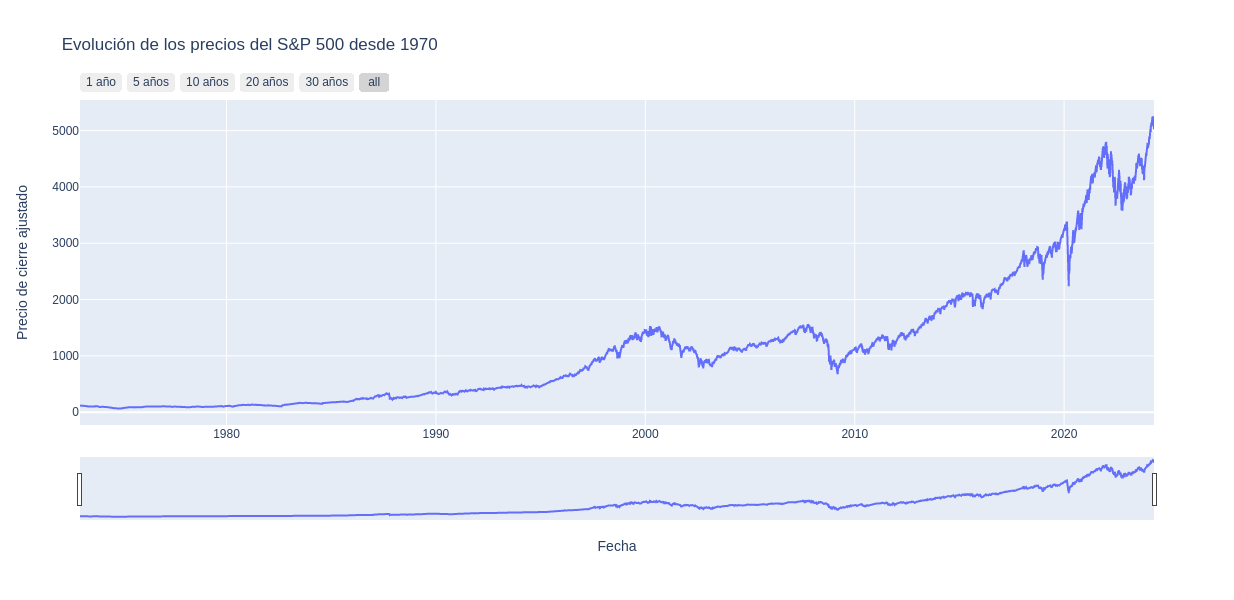

Media de drawdowns de las crisis: 35.9558572867734


Crisis Máximo Drawdown  \
0                        Crisis del petróleo de 1973          23.35%   
1  Crisis financiera de América Latina (década de...          33.51%   
2                                 Lunes Negro (1987)          31.47%   
3              Crisis financiera de Asia (1997-1998)          10.80%   
4                       Crisis del rublo ruso (1998)          13.95%   
5                Crisis de las punto com (2000-2002)          36.77%   
6              Crisis financiera mundial (2007-2008)          51.93%   
7  Crisis de la deuda soberana en Europa (2010-2012)          19.39%   
8             Crisis financiera en China (2015-2016)          12.25%   
9                         Crisis del COVID-19 (2020)          33.92%   

  Fecha del Máximo Drawdown  
0                1974-01-01  
1                1990-01-01  
2                1987-11-01  
3                1998-01-01  
4                1998-09-01  
5                2002-01-01  
6                2009-01-01  
7                2012-01-01  
8                2016-01-01  
9                2021-01-01

In [52]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go

class CrisisAnalyzer:
    def __init__(self, ticker, start_date):
        self.ticker = ticker
        self.start_date = start_date
        
    def calcular_max_drawdown(self, start_date, end_date):
        data = yf.download(self.ticker, start=start_date, end=end_date, progress=False)
        adj_close = data['Adj Close']
        
        # Calcular el drawdown acumulado
        max_drawdown = 0
        peak_value = adj_close.iloc[0]
        for value in adj_close:
            if value > peak_value:
                peak_value = value
            drawdown = (peak_value - value) / peak_value
            if drawdown > max_drawdown:
                max_drawdown = drawdown
                
        return max_drawdown * 100
    
    def obtener_drawdown_table(self, crisis_dates):
        # Crear una lista para almacenar los resultados
        drawdowns = []
        
        # Iterar sobre las crisis y calcular los drawdowns
        results = []
        for crisis, (start_date, end_date) in crisis_dates.items():
            max_drawdown = self.calcular_max_drawdown(start_date, end_date)
            drawdowns.append(max_drawdown)
            results.append({
                'Crisis': crisis,
                'Máximo Drawdown': f"{max_drawdown:.2f}%",
                'Fecha del Máximo Drawdown': end_date
            })
        
        # Calcular el promedio de los drawdowns
        mean_drawdown = sum(drawdowns) / len(drawdowns)
        
        # Convertir la lista de resultados en un DataFrame
        drawdown_df = pd.DataFrame(results)
        
        return drawdown_df

    def graficar_evolution_plotly(self, start_date):
        sp500_data = yf.download(self.ticker, start=start_date, progress=False)
        # Crear un gráfico interactivo con Plotly
        fig = go.Figure()
        
        # Agregar una línea para los precios de cierre ajustados
        fig.add_trace(go.Scatter(x=sp500_data.index, y=sp500_data['Adj Close'], mode='lines', name='S&P 500'))
        
        # Configurar el diseño del gráfico
        fig.update_layout(
            title='Evolución de los precios del S&P 500 desde 1970',
            xaxis_title='Fecha',
            yaxis_title='Precio de cierre ajustado',
            xaxis=dict(
                rangeselector=dict(
                    buttons=list([
                        dict(count=1, label="1 año", step="year", stepmode="backward"),
                        dict(count=5, label="5 años", step="year", stepmode="backward"),
                        dict(count=10, label="10 años", step="year", stepmode="backward"),
                        dict(count=20, label="20 años", step="year", stepmode="backward"),
                        dict(count=30, label="30 años", step="year", stepmode="backward"),
                        dict(step="all")
                    ])
                ),
                rangeslider=dict(visible=True),
                type="date"
            ),
            height=600  # Aumentar la altura de la ventana
        )
        
        # Mostrar el gráfico interactivo
        fig.show()


# Definir las fechas de las crisis financieras
crisis_dates = {
    'Crisis del petróleo de 1973': ('1973-01-01', '1974-01-01'),
    'Crisis financiera de América Latina (década de 1980)': ('1980-01-01', '1990-01-01'),
    'Lunes Negro (1987)': ('1987-10-01', '1987-11-01'),
    'Crisis financiera de Asia (1997-1998)': ('1997-07-01', '1998-01-01'),
    'Crisis del rublo ruso (1998)': ('1998-08-01', '1998-09-01'),
    'Crisis de las punto com (2000-2002)': ('2000-01-01', '2002-01-01'),
    'Crisis financiera mundial (2007-2008)': ('2007-01-01', '2009-01-01'),
    'Crisis de la deuda soberana en Europa (2010-2012)': ('2010-01-01', '2012-01-01'),
    'Crisis financiera en China (2015-2016)': ('2015-06-01', '2016-01-01'),
    'Crisis del COVID-19 (2020)': ('2020-01-01', '2021-01-01')
}


ticker='^GSPC'
start_date =  '1973-1-1'
# Crear una instancia de CrisisAnalyzer
analyzer = CrisisAnalyzer(ticker, start_date)

# Obtener la tabla de drawdowns
drawdown_table = analyzer.obtener_drawdown_table(crisis_dates)

analyzer.graficar_evolution_plotly(start_date)

# Imprimir la media de los drawdowns
print("Media de drawdowns de las crisis:", mean_drawdown)

# Mostrar la tabla
drawdown_table


## Sentimiento del mercado versus S&P 50

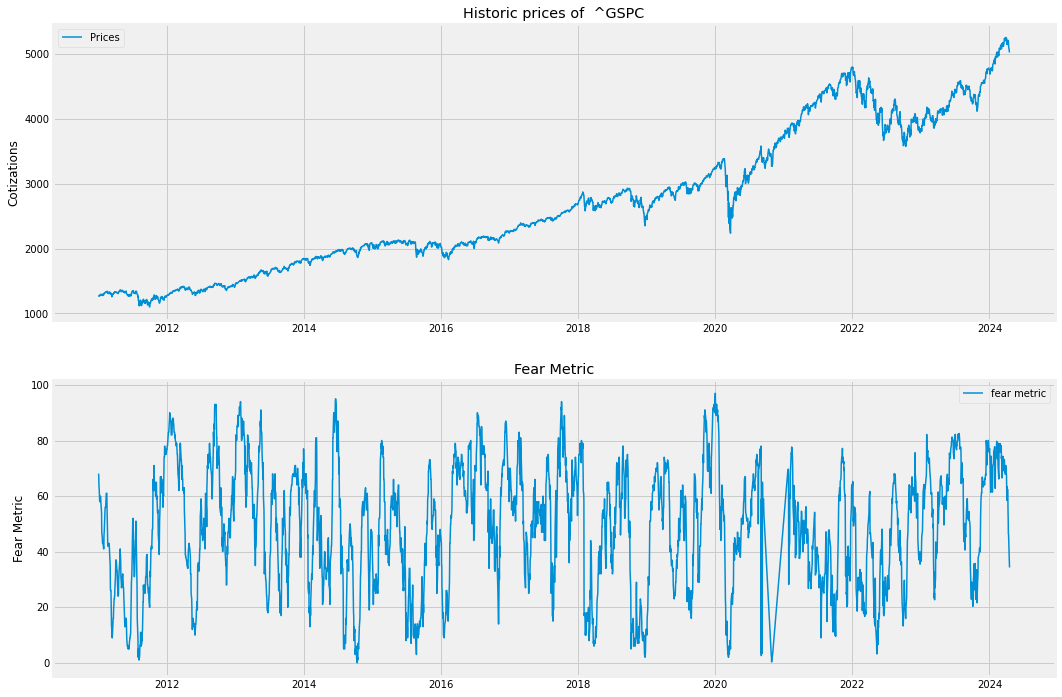

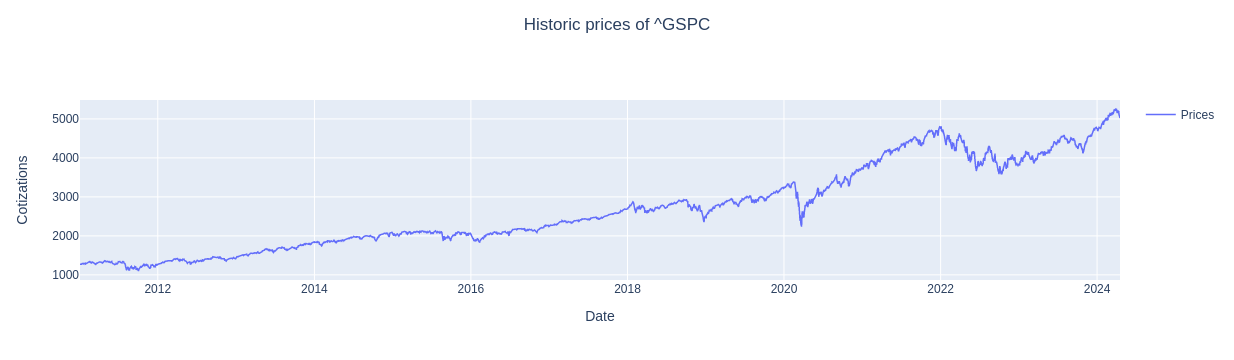

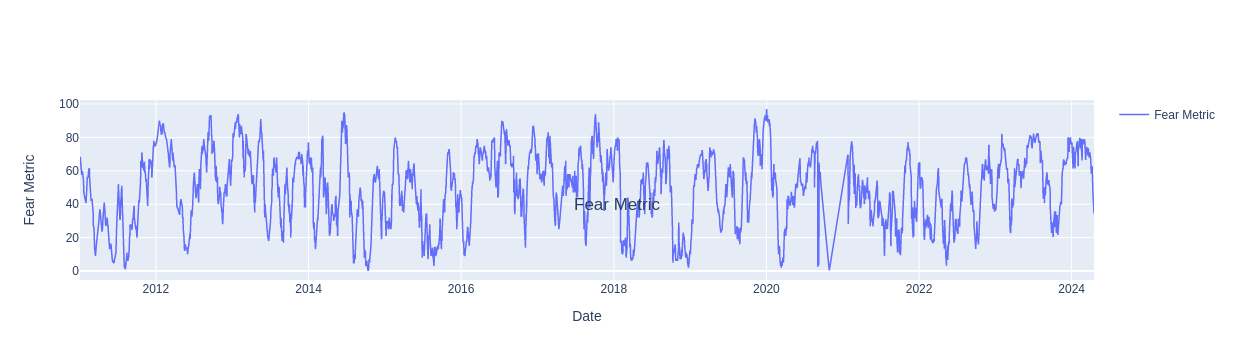

In [56]:
ticker_val = '^GSPC'
start_day = "2011-01-01"
end_day = datetime.today().strftime('%Y-%m-%d')

# Market quotes
df_val, df_value, value_name =  get_quotes_yf_one_ticker(ticker_val, start_day, end_day) 
#amundiMSCI = get_quotes_from_xlsx()
df_fear_greed_internet = get_fear_greed_from_20200818()
df_fear_greed_2011_2020   =  get_fear_greed_2011_2020()
df_total = get_df_fear_greed_total(df_value, df_fear_greed_2011_2020 , df_fear_greed_internet )
df_fear_greed_total = complete_ratings(df_total)    
#fear_greed_total['rating'] = fear_greed_total['fear_metric'].apply(lambda x: obtener_categorias(x))
get_graphics(df_val, df_fear_greed_total) 

get_graphic_ploty(df_val, df_fear_greed_total, value_name)


# Análisis del comportamiento del IBEX 35.

## Cotizaciones mínimas del IBEX 35 en estas crisis.

- **Crisis del petróleo de 1973:** Durante la crisis del petróleo de 1973, el IBEX 35 no estaba aún establecido, ya que comenzó a cotizar en 1992 como índice bursátil español.

- **Crisis financiera de América Latina (década de 1980):** Durante la década de 1980, el IBEX 35 aún no existía como índice bursátil español.

- ** Lunes Negro (1987):** En el lunes negro del 19 de octubre de 1987, el IBEX 35 no estaba aún establecido, ya que comenzó a cotizar en 1992.

    Crisis financiera de Asia (1997-1998): Durante la crisis financiera de Asia, el IBEX 35 no experimentó mínimos notables asociados específicamente con esta crisis.

    Crisis del euro (1999-2002): Durante la crisis del euro, el IBEX 35 experimentó una fuerte volatilidad y una caída significativa en su valor. En julio de 2012, alcanzó su mínimo, cayendo a alrededor de los 6,000 puntos.

    Crisis financiera mundial (2007-2008): Durante la crisis financiera mundial, el IBEX 35 alcanzó su mínimo en julio de 2012, descendiendo a aproximadamente los 6,000 puntos.

    Crisis de la deuda soberana en Europa (2010-2012): Durante la crisis de la deuda soberana en Europa, el IBEX 35 experimentó una fuerte volatilidad y alcanzó su mínimo en julio de 2012, cayendo a alrededor de los 6,000 puntos.

    Crisis financiera en China (2015-2016): Durante la crisis financiera en China, el IBEX 35 experimentó volatilidad, pero no alcanzó mínimos notables asociados específicamente con esta crisis.

    Crisis del COVID-19 (2020): En marzo de 2020, debido a la crisis del COVID-19, el IBEX 35 alcanzó su mínimo, descendiendo a alrededor de los 6,000 puntos.

## Valores mínimos durante las crisis.

In [41]:
import yfinance as yf

# Definir las fechas de las crisis financieras
crisis_dates = {
    'Crisis financiera de Asia (1997-1998)': ('1997-07-01', '1998-01-01'),
    'Crisis del rublo ruso (1998)': ('1998-08-01', '1998-09-01'),
    'Crisis de las punto com (2000-2002)': ('2000-01-01', '2002-01-01'),
    'Crisis financiera mundial (2007-2008)': ('2007-01-01', '2009-01-01'),
    'Crisis de la deuda soberana en Europa (2010-2012)': ('2010-01-01', '2012-01-01'),
    'Crisis financiera en China (2015-2016)': ('2015-06-01', '2016-01-01'),
    'Crisis del COVID-19 (2020)': ('2020-01-01', '2021-01-01')
}

# Función para obtener el valor mínimo del S&P 500 dentro de un rango de fechas
def obtener_minimo_sp500(start_date, end_date):
    data = yf.download('^IBEX', start=start_date, end=end_date, progress=False)
    return data['Adj Close'].min()

# Iterar sobre las crisis y obtener los valores mínimos
for crisis, (start_date, end_date) in crisis_dates.items():
    min_value = obtener_minimo_sp500(start_date, end_date)
    print(f"Valor mínimo del S&P 500 durante {crisis}: {min_value:.2f}")


Valor mínimo del S&P 500 durante Crisis financiera de Asia (1997-1998): 6049.89
Valor mínimo del S&P 500 durante Crisis del rublo ruso (1998): 8264.69
Valor mínimo del S&P 500 durante Crisis de las punto com (2000-2002): 6498.39
Valor mínimo del S&P 500 durante Crisis financiera mundial (2007-2008): 7905.39
Valor mínimo del S&P 500 durante Crisis de la deuda soberana en Europa (2010-2012): 7640.69
Valor mínimo del S&P 500 durante Crisis financiera en China (2015-2016): 9291.39
Valor mínimo del S&P 500 durante Crisis del COVID-19 (2020): 6107.20


In [44]:
data = yf.download('^STOXX50E',  progress=False)
data

Open         High          Low        Close    Adj Close  \
Date                                                                          
2007-03-30  4177.669922  4207.759766  4160.350098  4181.029785  4181.029785   
2007-04-02  4177.310059  4191.759766  4163.770020  4189.549805  4189.549805   
2007-04-03  4199.540039  4248.069824  4199.540039  4246.299805  4246.299805   
2007-04-04  4252.709961  4261.830078  4242.049805  4261.830078  4261.830078   
2007-04-05  4259.979980  4274.169922  4253.790039  4271.540039  4271.540039   
...                 ...          ...          ...          ...          ...   
2024-04-12  4986.029785  5023.899902  4935.029785  4955.009766  4955.009766   
2024-04-15  4969.000000  5034.729980  4969.000000  4984.479980  4984.479980   
2024-04-16  4962.149902  4962.149902  4899.410156  4916.990234  4916.990234   
2024-04-17  4918.729980  4968.410156  4898.899902  4914.129883  4914.129883   
2024-04-18  4924.830078  4940.549805  4924.500000  4931.049805  4931.049805   

              Volume  
Date                  
2007-03-30         0  
2007-04-02         0  
2007-04-03         0  
2007-04-04         0  
2007-04-05         0  
...              ...  
2024-04-12  27782600  
2024-04-15  24465200  
2024-04-16  27874400  
2024-04-17  22788100  
2024-04-18         0  

[4277 rows x 6 columns]

## Media y Mínimos drawdowns dutante las crisis.

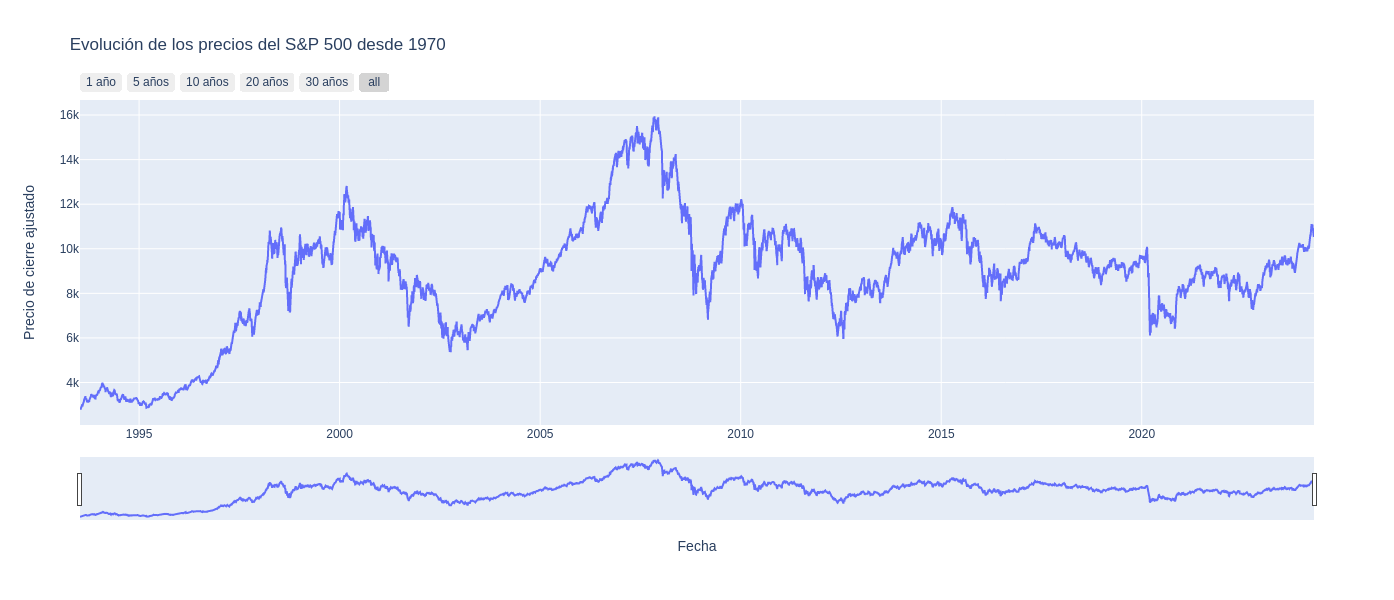

Media de drawdowns de las crisis: 26.733101766159677


Crisis Máximo Drawdown  \
0              Crisis financiera de Asia (1997-1998)          17.49%   
1                       Crisis del rublo ruso (1998)          21.25%   
2                Crisis de las punto com (2000-2002)          49.30%   
3              Crisis financiera mundial (2007-2008)          50.42%   
4  Crisis de la deuda soberana en Europa (2010-2012)          37.49%   
5             Crisis financiera en China (2015-2016)          19.60%   
6                         Crisis del COVID-19 (2020)          39.43%   

  Fecha del Máximo Drawdown  
0                1998-01-01  
1                1998-09-01  
2                2002-01-01  
3                2009-01-01  
4                2012-01-01  
5                2016-01-01  
6                2021-01-01

In [42]:
# Definir las fechas de las crisis financieras
crisis_dates = {
    'Crisis financiera de Asia (1997-1998)': ('1997-07-01', '1998-01-01'),
    'Crisis del rublo ruso (1998)': ('1998-08-01', '1998-09-01'),
    'Crisis de las punto com (2000-2002)': ('2000-01-01', '2002-01-01'),
    'Crisis financiera mundial (2007-2008)': ('2007-01-01', '2009-01-01'),
    'Crisis de la deuda soberana en Europa (2010-2012)': ('2010-01-01', '2012-01-01'),
    'Crisis financiera en China (2015-2016)': ('2015-06-01', '2016-01-01'),
    'Crisis del COVID-19 (2020)': ('2020-01-01', '2021-01-01')
}


ticker='^IBEX'
start_date =  '1993-7-12'
# Crear una instancia de CrisisAnalyzer
analyzer = CrisisAnalyzer(ticker, start_date)

# Obtener la tabla de drawdowns
drawdown_table = analyzer.obtener_drawdown_table(crisis_dates)

analyzer.graficar_evolution_plotly(start_date)

# Imprimir la media de los drawdowns
print("Media de drawdowns de las crisis:", mean_drawdown)

# Mostrar la tabla
drawdown_table


## Sentimiento del mercado versus IBEX 35.

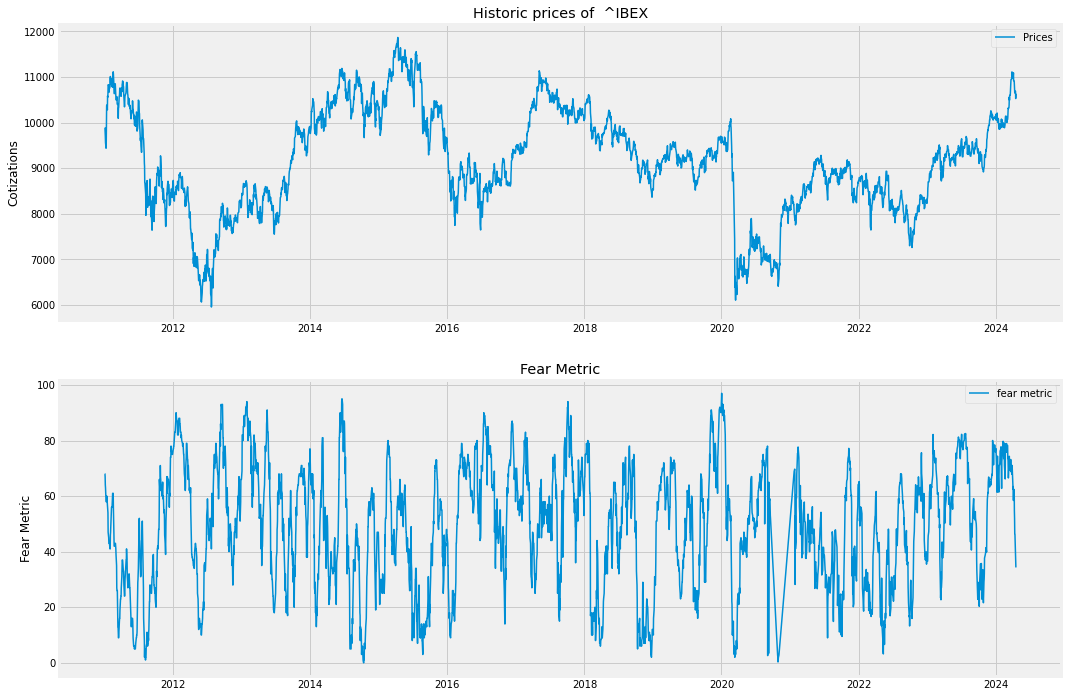

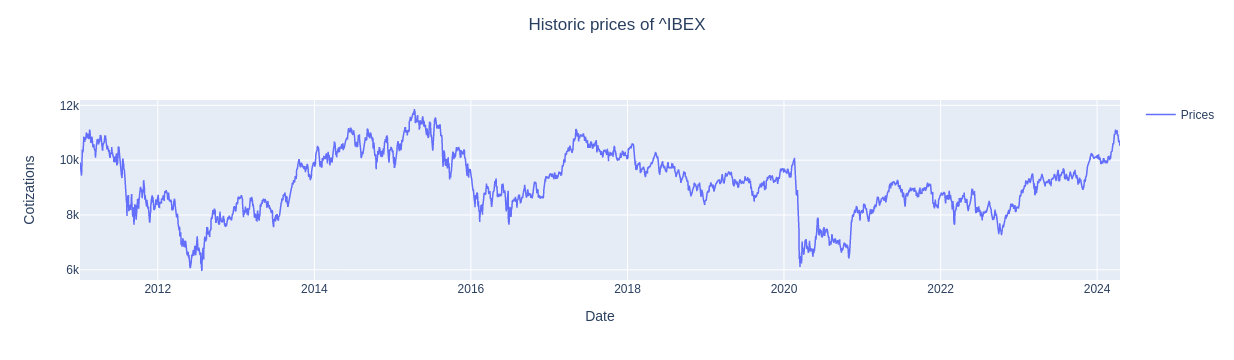

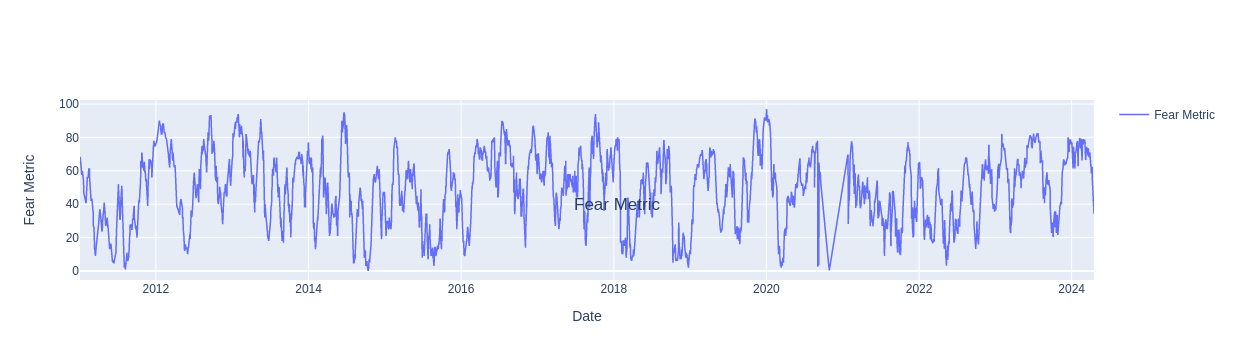

In [57]:
ticker_val = '^IBEX'
start_day = "2011-01-01"
end_day = datetime.today().strftime('%Y-%m-%d')

# Market quotes
df_val, df_value, value_name =  get_quotes_yf_one_ticker(ticker_val, start_day, end_day) 
#amundiMSCI = get_quotes_from_xlsx()
df_fear_greed_internet = get_fear_greed_from_20200818()
df_fear_greed_2011_2020   =  get_fear_greed_2011_2020()
df_total = get_df_fear_greed_total(df_value, df_fear_greed_2011_2020 , df_fear_greed_internet )
df_fear_greed_total = complete_ratings(df_total)    
#fear_greed_total['rating'] = fear_greed_total['fear_metric'].apply(lambda x: obtener_categorias(x))
get_graphics(df_val, df_fear_greed_total) 

get_graphic_ploty(df_val, df_fear_greed_total, value_name)


# Análisis del comportamiento del Eurostoxx.
El Euro Stoxx 50, que es un índice bursátil de la zona euro, comenzó a cotizar el 26 de febrero de 1998. Fue creado por la empresa de indexación bursátil STOXX Ltd. y es uno de los índices más importantes de Europa, ya que representa a las 50 empresas líderes de la región en términos de capitalización bursátil y liquidez.

## Cotizaciónes minimas en las crisis.

    Crisis del petróleo de 1973: Durante la crisis del petróleo de 1973, el Euro Stoxx 50 no estaba aún establecido, ya que comenzó a cotizar en 1998 como índice bursátil europeo.

    Crisis financiera de América Latina (década de 1980): Durante la década de 1980, el Euro Stoxx 50 no estaba aún establecido.

    Lunes Negro (1987): En el lunes negro del 19 de octubre de 1987, el Euro Stoxx 50 no estaba aún establecido.

    Crisis financiera de Asia (1997-1998): Durante la crisis financiera de Asia, el Euro Stoxx 50 no experimentó mínimos notables asociados específicamente con esta crisis.

    Crisis del euro (1999-2002): Durante la crisis del euro, el Euro Stoxx 50 alcanzó su mínimo en septiembre de 2002, cayendo a alrededor de los 2,200 puntos.

    Crisis financiera mundial (2007-2008): Durante la crisis financiera mundial, el Euro Stoxx 50 alcanzó su mínimo en marzo de 2009, descendiendo a aproximadamente los 1,800 puntos.

    Crisis de la deuda soberana en Europa (2010-2012): Durante la crisis de la deuda soberana en Europa, el Euro Stoxx 50 alcanzó su mínimo en julio de 2012, cayendo a alrededor de los 2,200 puntos.

    Crisis financiera en China (2015-2016): Durante la crisis financiera en China, el Euro Stoxx 50 experimentó volatilidad, pero no alcanzó mínimos notables asociados específicamente con esta crisis.

    Crisis del COVID-19 (2020): En marzo de 2020, debido a la crisis del COVID-19, el Euro Stoxx 50 alcanzó su mínimo, descendiendo a alrededor de los 2,500 puntos.

In [51]:
import yfinance as yf

# Definir las fechas de las crisis financieras
crisis_dates = {
    'Crisis financiera mundial (2007-2008)': ('2007-01-01', '2009-01-01'),
    'Crisis de la deuda soberana en Europa (2010-2012)': ('2010-01-01', '2012-01-01'),
    'Crisis financiera en China (2015-2016)': ('2015-06-01', '2016-01-01'),
    'Crisis del COVID-19 (2020)': ('2020-01-01', '2021-01-01')
}

# Función para obtener el valor mínimo del S&P 500 dentro de un rango de fechas
def obtener_minimo_sp500(start_date, end_date):
    data = yf.download('^STOXX50E', start=start_date, end=end_date, progress=False)
    return data['Adj Close'].min()

# Iterar sobre las crisis y obtener los valores mínimos
for crisis, (start_date, end_date) in crisis_dates.items():
    min_value = obtener_minimo_sp500(start_date, end_date)
    print(f"Valor mínimo del Eurostoxx 50 durante {crisis}: {min_value:.2f}")


Valor mínimo del Eurostockxx durante Crisis financiera mundial (2007-2008): 2165.91
Valor mínimo del Eurostockxx durante Crisis de la deuda soberana en Europa (2010-2012): 1995.01
Valor mínimo del Eurostockxx durante Crisis financiera en China (2015-2016): 3019.34
Valor mínimo del Eurostockxx durante Crisis del COVID-19 (2020): 2385.82


## Media y Mínimos drawdowns durante las crisis.

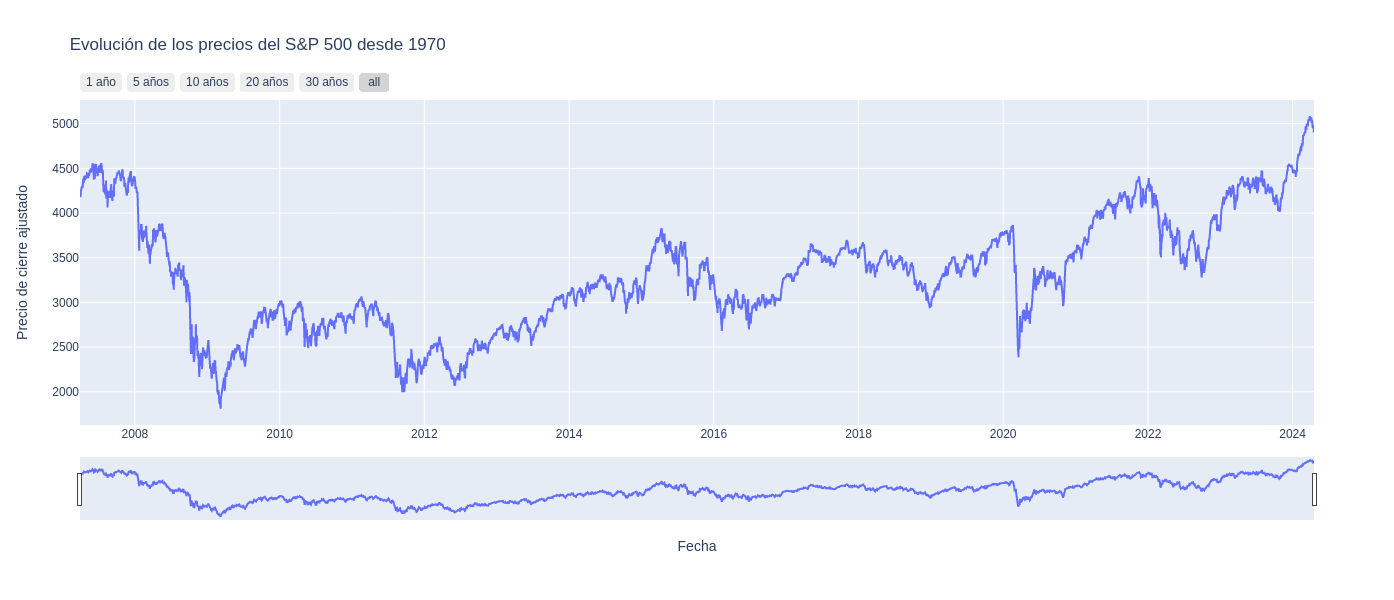

Media de drawdowns de las crisis: 35.9558572867734


(35.9558572867734,
                                               Crisis Máximo Drawdown  \
 0              Crisis financiera mundial (2007-2008)          52.48%   
 1  Crisis de la deuda soberana en Europa (2010-2012)          34.97%   
 2             Crisis financiera en China (2015-2016)          18.10%   
 3                         Crisis del COVID-19 (2020)          38.27%   
 
   Fecha del Máximo Drawdown  
 0                2009-01-01  
 1                2012-01-01  
 2                2016-01-01  
 3                2021-01-01  )

In [50]:
# Definir las fechas de las crisis financieras
crisis_dates = {
    'Crisis financiera mundial (2007-2008)': ('2007-01-01', '2009-01-01'),
    'Crisis de la deuda soberana en Europa (2010-2012)': ('2010-01-01', '2012-01-01'),
    'Crisis financiera en China (2015-2016)': ('2015-06-01', '2016-01-01'),
    'Crisis del COVID-19 (2020)': ('2020-01-01', '2021-01-01')
}

ticker='^STOXX50E'
start_date = '2007-03-30'  # Fecha de inicio para el análisis

# Crear una instancia de CrisisAnalyzer
analyzer = CrisisAnalyzer(ticker, start_date)

# Obtener la tabla de drawdowns
drawdown_table = analyzer.obtener_drawdown_table(crisis_dates)

analyzer.graficar_evolution_plotly(start_date)

# Imprimir la media de los drawdowns
print("Media de drawdowns de las crisis:", mean_drawdown)

# Mostrar la tabla
drawdown_table


## Sentimiento del mercado versus Eurostoxx 50.

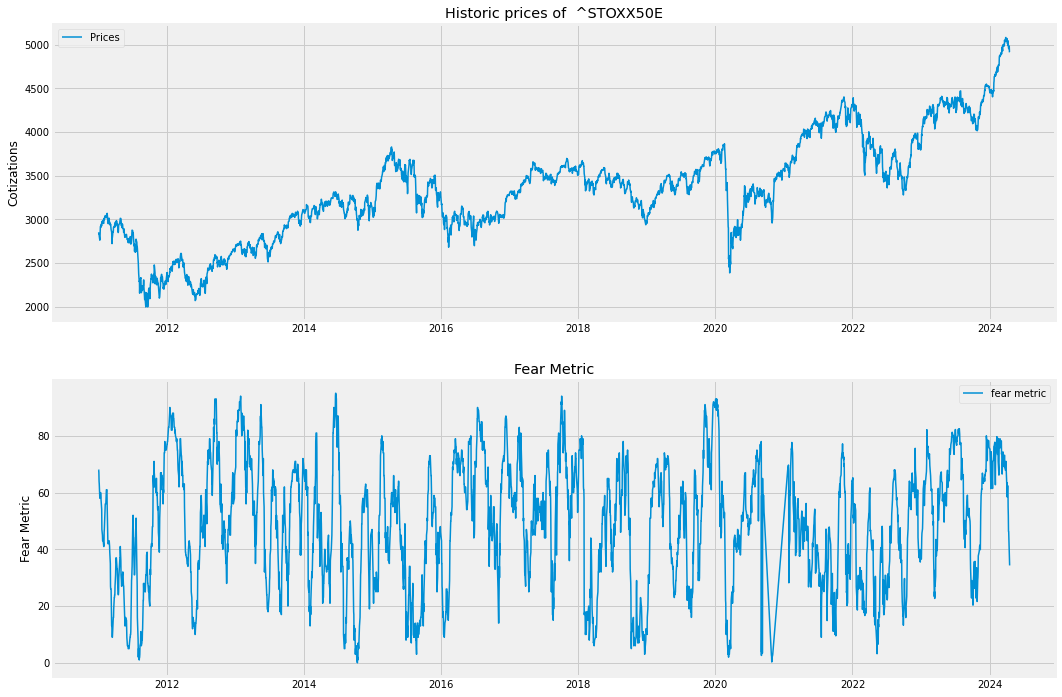

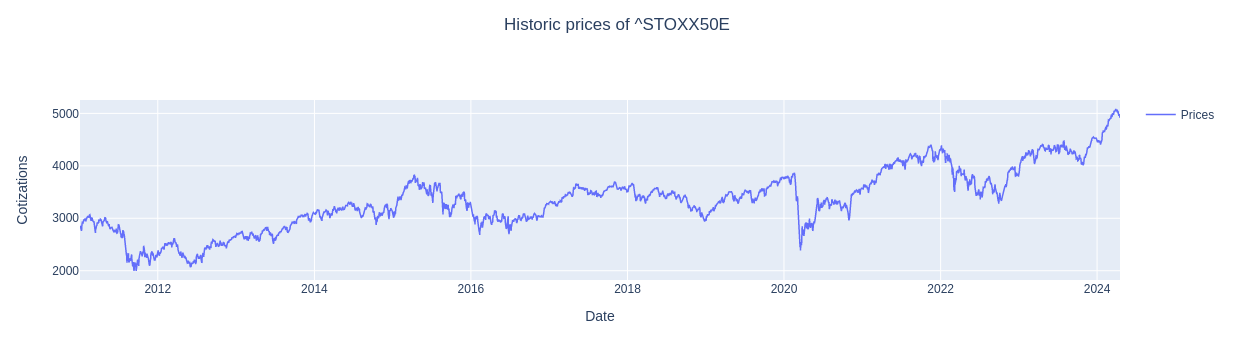

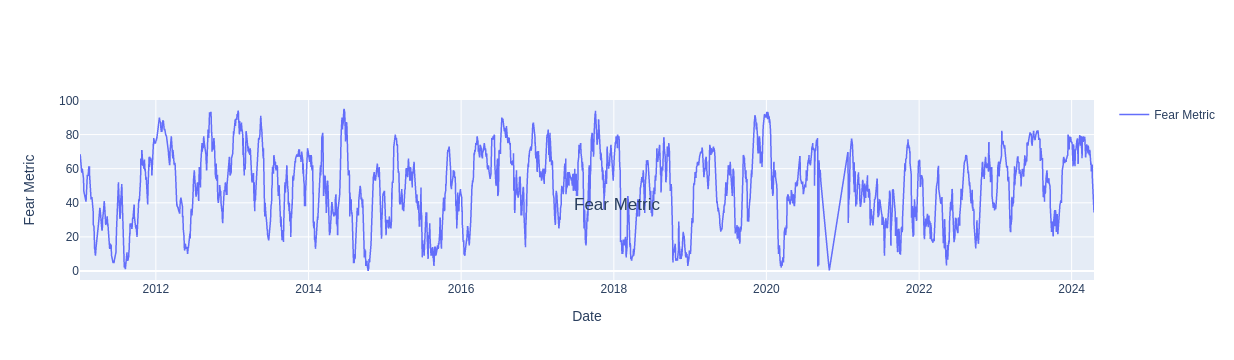

In [58]:
ticker_val = '^STOXX50E'
start_day = "2011-01-01"
end_day = datetime.today().strftime('%Y-%m-%d')

# Market quotes
df_val, df_value, value_name =  get_quotes_yf_one_ticker(ticker_val, start_day, end_day) 
#amundiMSCI = get_quotes_from_xlsx()
df_fear_greed_internet = get_fear_greed_from_20200818()
df_fear_greed_2011_2020   =  get_fear_greed_2011_2020()
df_total = get_df_fear_greed_total(df_value, df_fear_greed_2011_2020 , df_fear_greed_internet )
df_fear_greed_total = complete_ratings(df_total)    
#fear_greed_total['rating'] = fear_greed_total['fear_metric'].apply(lambda x: obtener_categorias(x))
get_graphics(df_val, df_fear_greed_total) 

get_graphic_ploty(df_val, df_fear_greed_total, value_name)


# Nota de advertencias.
Este notebook tiene fines educativos y de demostración solamente. Las estrategias de inversión presentadas aquí son ejemplos y pueden contener errores. Se recomienda encarecidamente que cualquier decisión de inversión se tome después de consultar con un asesor financiero calificado. No se proporciona asesoramiento financiero, y cualquier uso de la información presentada es bajo su propio riesgo. Agradecemos cualquier retroalimentación para mejorar la calidad de estos ejemplos.  
Es importante recordar que no hay una estrategia única que funcione en todos los casos, y siempre hay un riesgo asociado con la inversión. Es recomendable realizar pruebas exhaustivas y análisis antes de implementar cualquier estrategia en un entorno de trading real.